<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pH

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
file_name = '/content/drive/MyDrive/Data/ST_pH.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 553kB
Dimensions:    (depth: 50, time: 910, latitude: 1, longitude: 1)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4B 20.5
  * longitude  (longitude) float32 4B 92.25
  * time       (time) datetime64[ns] 7kB 2022-01-01 2022-01-02 ... 2024-06-28
Data variables:
    dissic     (time, depth, latitude, longitude) float32 182kB ...
    ph         (time, depth, latitude, longitude) float32 182kB ...
    talk       (time, depth, latitude, longitude) float32 182kB ...
Attributes:
    Conventions:       CF-1.11
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    subset:datasetId:  cmems_mod_glo_bgc-car_anfc_0.25deg_P1D-m_202311
    subset:date:      

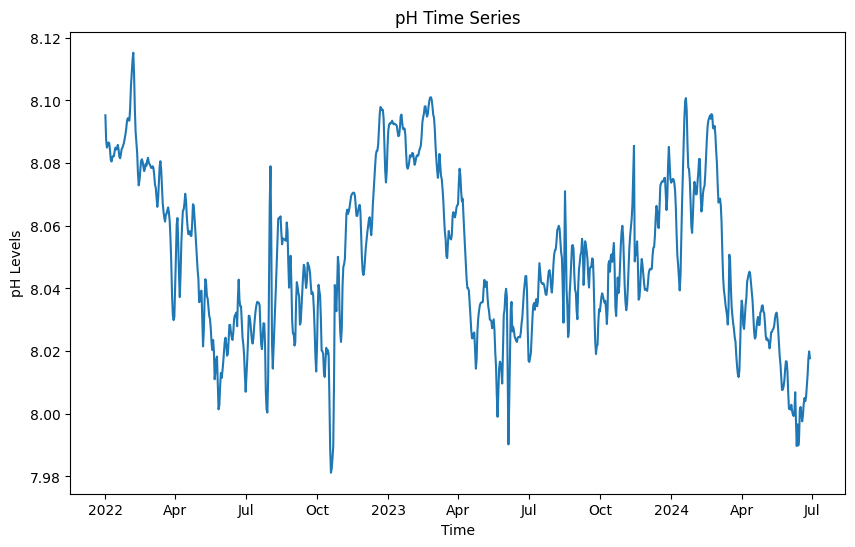

In [ ]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['ph'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('pH Time Series')
plt.xlabel('Time')
plt.ylabel('pH Levels')
plt.show()

# Chlorophyll

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
file_name = '/content/drive/MyDrive/Data/ST_Chlorophyll.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 15kB
Dimensions:    (time: 910, depth: 1, latitude: 1, longitude: 1)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 20.5
  * longitude  (longitude) float32 4B 92.25
  * time       (time) datetime64[ns] 7kB 2022-01-01 2022-01-02 ... 2024-06-28
Data variables:
    chl        (time, depth, latitude, longitude) float32 4kB ...
    phyc       (time, depth, latitude, longitude) float32 4kB ...
Attributes:
    Conventions:       CF-1.11
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    subset:datasetId:  cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m_202311
    subset:date:       2024-06-24T17:40:17.985Z
    subset:productId:  GLOBAL_ANALYSISFORECAST_BGC_001_028
    subset:source:     ARCO

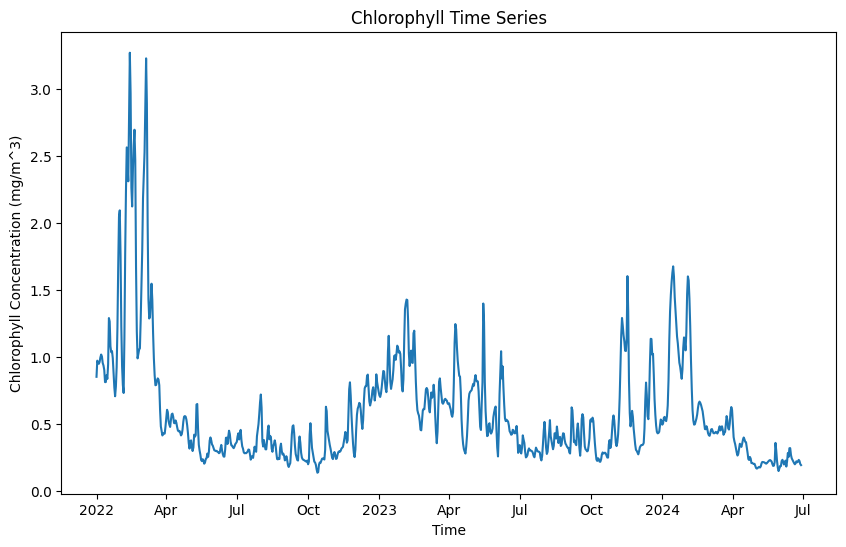

In [28]:
plt.figure(figsize=(10, 6))
Chl_time_data = ds['chl'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
Chl_time_data.plot()
plt.title('Chlorophyll Time Series')
plt.xlabel('Time')
plt.ylabel('Chlorophyll Concentration (mg/m^3)')
plt.show()

# Primary Productivity

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
file_name = '/content/drive/MyDrive/Data/ST_PP.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 385kB
Dimensions:    (depth: 50, latitude: 1, longitude: 1, time: 944)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4B 20.5
  * longitude  (longitude) float32 4B 92.25
  * time       (time) datetime64[ns] 8kB 2021-11-28 2021-11-29 ... 2024-06-28
Data variables:
    nppv       (time, depth, latitude, longitude) float32 189kB ...
    o2         (time, depth, latitude, longitude) float32 189kB ...
Attributes:
    Conventions:       CF-1.11
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    subset:datasetId:  cmems_mod_glo_bgc-bio_anfc_0.25deg_P1D-m_202311
    subset:date:       2024-06-24T08:34:39.576Z
    subset:productId:  GLOBAL_ANALYSISFORE

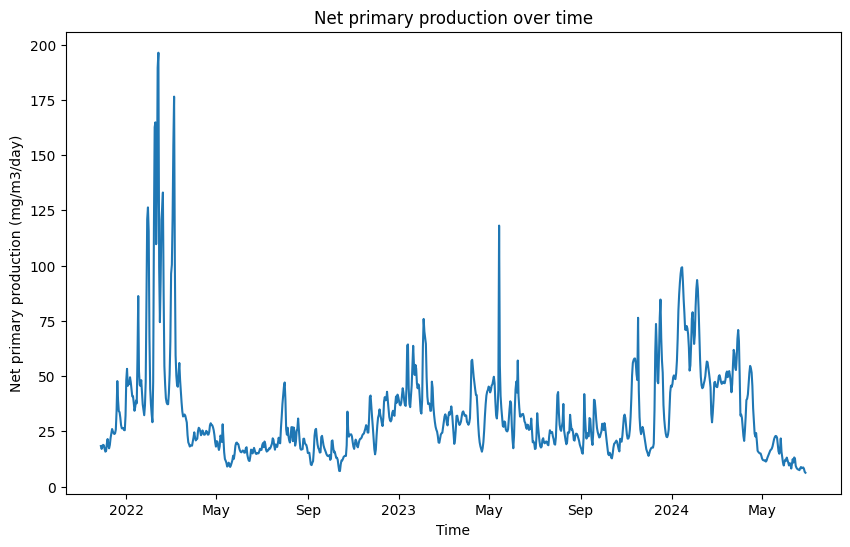

In [25]:
plt.figure(figsize=(10, 6))
Chl_time_data = ds['nppv'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
Chl_time_data.plot()
plt.title('Net primary production over time')
plt.xlabel('Time')
plt.ylabel('Net primary production (mg/m3/day)')
plt.show()